In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 버전 확인 

print(pd.__version__)
print(sns.__version__)
# !pip install seaborn --upgrade

1.2.4
0.11.1


# MPG DATASET
* mpg(miles per gallon) => 갤런 당 마일 ( 차량의 연료 소비 정도를 나타내는말)
* origin : mpg 생산 지역
* horsepower : 마력 ( 동력이나 일률을 측정하는 단위)

In [3]:
# seaborn에서 제공하는 mpg data로 실습해보자 

df= sns.load_dataset('mpg')
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


# 1. Data Set 기본 정보 파악하기

* 1.1) df.index, df.columns, df.values ,dtypes
* 1.2) head(), tail(), sample()
* 1.3) isnull() : 결측치 확인
* 1.4) info(), describe(), nuinque()
* 1.5) .loc(), .iloc() : 특정 데이터 불러오기

## 1.1) index, columns, values, dtypes

In [4]:
# index 값만 보기
df.index

RangeIndex(start=0, stop=398, step=1)

In [5]:
# columns 값만 보기
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

In [6]:
# values 값만 보기
df.values

array([[18.0, 8, 307.0, ..., 70, 'usa', 'chevrolet chevelle malibu'],
       [15.0, 8, 350.0, ..., 70, 'usa', 'buick skylark 320'],
       [18.0, 8, 318.0, ..., 70, 'usa', 'plymouth satellite'],
       ...,
       [32.0, 4, 135.0, ..., 82, 'usa', 'dodge rampage'],
       [28.0, 4, 120.0, ..., 82, 'usa', 'ford ranger'],
       [31.0, 4, 119.0, ..., 82, 'usa', 'chevy s-10']], dtype=object)

In [7]:
# 데이터 타입만 보기
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model_year        int64
origin           object
name             object
dtype: object

## 1.2) head, tail, sample(random_state, frac)

In [8]:
# head 을 통해 일부만 가져오기

df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [9]:
# tail 을 통해 일부만 가져오기
df.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger
397,31.0,4,119.0,82.0,2720,19.4,82,usa,chevy s-10


In [10]:
# sample을 통해 일부만 가져오기
# random_state ==> random 값을 고정 시켜준다. 
# => random_state로 한번 random으로 가져온 sample 은 이제 변하지 않는다 

df.sample(3, random_state=42)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
198,33.0,4,91.0,53.0,1795,17.4,76,japan,honda civic
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger
33,19.0,6,232.0,100.0,2634,13.0,71,usa,amc gremlin


In [11]:
# frac ==> 비율로 데이터 가져온다
df.sample(frac = 0.01)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
285,17.0,8,305.0,130.0,3840,15.4,79,usa,chevrolet caprice classic
273,23.9,4,119.0,97.0,2405,14.9,78,japan,datsun 200-sx
231,15.5,8,400.0,190.0,4325,12.2,77,usa,chrysler cordoba
306,28.8,6,173.0,115.0,2595,11.3,79,usa,chevrolet citation


## 1.3) 결측치확인 : isnull

In [12]:
# 결측치 수 확인
# Ture == 1 ,False == 0 이기 때문 

df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [13]:
# 결측치 비율 확인
# Ture == 1 ,False == 0 이기 때문 

df.isnull().mean()*100

mpg             0.000000
cylinders       0.000000
displacement    0.000000
horsepower      1.507538
weight          0.000000
acceleration    0.000000
model_year      0.000000
origin          0.000000
name            0.000000
dtype: float64

<AxesSubplot:>

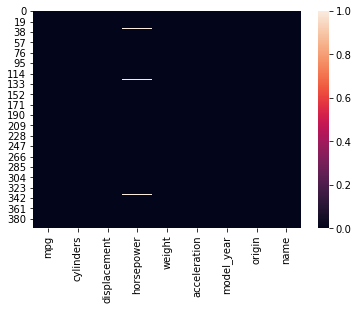

In [160]:
# 결측치를 heatmap으로도 표현해 볼 수 있다
sns.heatmap(df.isnull())

## 1.4) info(), decribe(수치형), nunique(범주형)

In [14]:
# info 를 통해 요약정보 보기 => 결측치 있는지, 데이터 타입, 메모리 등을 확인한다.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [15]:
# describe 로 기술통계 확인하기
# 기본적으로 수치형 데이터 columns 만 계산된다.

df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [16]:
# 범주형 통계값을 보고 싶을 때는 (include = object) 해준다. 

# unique 
# top : unique한 3개 값 중 가장 많이 있는 값 'USA'
# freq ==> usa의 빈도수  

df.describe(include=object)

,origin,name
count,398,398
unique,3,305
top,usa,ford pinto
freq,249,6


In [17]:
# 각 열들의 unique 한 값 개수 확인하기
df.nunique()

# nunique : unique 한 값의 개수(n)을 보여준다
# 수치형중 unique 값을 보면, 5, 13, 3 개인 수치형은 범주형으로 볼 수 있겠구나 판단할 수 있음

mpg             129
cylinders         5
displacement     82
horsepower       93
weight          351
acceleration     95
model_year       13
origin            3
name            305
dtype: int64

In [18]:
# 특정 열의 uniqe한 값 확인하기

df['horsepower'].nunique()

93

In [19]:
# series 
df['mpg']

0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
393    27.0
394    44.0
395    32.0
396    28.0
397    31.0
Name: mpg, Length: 398, dtype: float64

In [20]:
# dataframe
df[['mpg']].head(3)

,mpg
0,18.0
1,15.0
2,18.0


In [21]:
df[['mpg','model_year']].head(3)

,mpg,model_year
0,18.0,70
1,15.0,70
2,18.0,70


## 1.5) 색인하기 : loc, iloc
* [컬럼]
* .loc[행]
* .loc[행, 열]
* .loc[조건식, 열]

In [22]:
# .loc [행(index값),열]
# 1,2 행 값 가져오기

df.loc[[1,2]]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite


In [23]:
# .loc [행(index값),열]
# 행, 열 지정해서 값 가져오기
df.loc[2,'mpg']

18.0

In [24]:
# .loc [행(index값),열]
# 행, 열 지정해서 값 가져오기
df.loc[:3, 'mpg']

0    18.0
1    15.0
2    18.0
3    16.0
Name: mpg, dtype: float64

In [25]:
df.loc[[1,2],['mpg','model_year']]

,mpg,model_year
1,15.0,70
2,18.0,70


In [26]:
# .iloc[행(index값, 열의 index값]
df.iloc[1,0]

15.0

In [27]:
# .iloc[행(index값, 열의 index값]
df.iloc[[0,1],[0,1]]

,mpg,cylinders
0,18.0,8
1,15.0,8


# 2. **수치형** 변수 시각화

## ***배경지식 1 : 정규분포**
* [위키백과 정규분포](https://ko.wikipedia.org/wiki/%EC%A0%95%EA%B7%9C_%EB%B6%84%ED%8F%AC)
    - 연속 확률 밀도 분포의 하나로 수집된 자료의 분포를 근사하는데 자주 사용됨
    - 정규분포표는 2개의 매개 변수 평균(m) 과 표준편차(시그마)에 대해 모양이 결정된다.
    - 특히, 평균이 0이고 표준편차가 1인 정규분포를 표준 정규 분포(standard normal distribution)라고 한다.
    - 평균(m) = 그래프의 위치를 결정한다.
    - 표준편차 = 그래프의 모양(첨도, 비대칭도(왜도))을 결정한다.
    
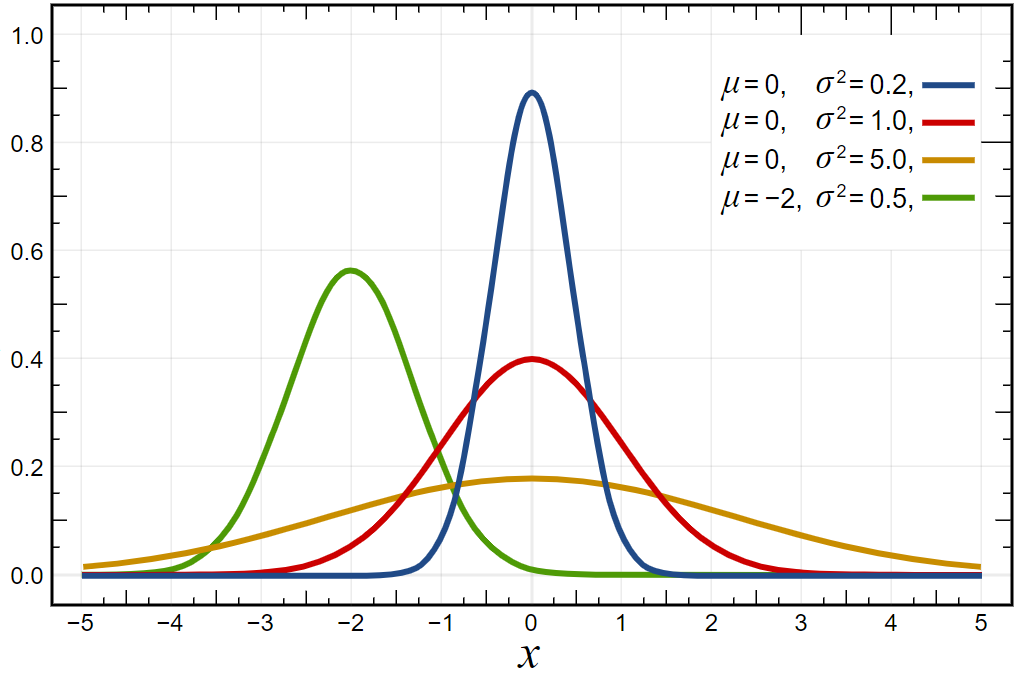

#### 첨도(뾰족도)(kurtk)

* 확률분포의 뾰족한 정도를 나타내는 척도
* 관측치들이 어느 정도 집중적으로 중심에 몰려 있는가를 측정할 때 사용
* 첨도값(K)이 3에 가까우면 산포도가 정규분포에 가까움
* 3보다 작을 경우에는(K<3) 산포는 정규분포보다 더 뾰족한 분포(꼬리가 얇은 분포)
* 첨도값이 3보다 큰 양수이면(K>3) 정규분포보다 더 완만한 납작한 분포(꼬리가 두꺼운 분포)

In [114]:
# kurt를 통해 전체 수치변수에 대한 첨도 구하기
# 3을 기준

df.kurt()
# 정규분포표보다 다 뾰족한 분포표구나 알 수 있음

mpg            -0.510781
cylinders      -1.376662
displacement   -0.746597
horsepower      0.696947
weight         -0.785529
acceleration    0.419497
model_year     -1.181232
dtype: float64

#### 비대칭도(왜도)(skew)

* 실수 값 확률 변수의 확률 분포 비대칭성을 나타내는 지표
* 왜도의 값은 양수나 음수가 될 수 있으며 정의되지 않을 수도 있음
* 왜도가 음수일 경우에는 확률밀도함수의 왼쪽 부분에 긴 꼬리를 가지며 중앙값을 포함한 자료가 오른쪽에 더 많이 분포
* 왜도가 양수일 때는 확률밀도함수의 오른쪽 부분에 긴 꼬리를 가지며 자료가 왼쪽에 더 많이 분포
* 평균과 중앙값이 같으면 왜도는 0

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/f8/Negative_and_positive_skew_diagrams_%28English%29.svg/700px-Negative_and_positive_skew_diagrams_%28English%29.svg.png" width="300" align="left">

In [115]:
# skew를 통해 전체 수치변수에 대한 왜도 구하기
# 값이 양수 일경우 왼쪽으로 쏠린 도수 분표표 

df.skew()

mpg             0.457066
cylinders       0.526922
displacement    0.719645
horsepower      1.087326
weight          0.531063
acceleration    0.278777
model_year      0.011535
dtype: float64

## **2.1) 1개의 수치 변수**
**boxplot 과 정규분포**
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/1a/Boxplot_vs_PDF.svg/1280px-Boxplot_vs_PDF.svg.png" width="300" align="left">

이미지 출처 : https://en.wikipedia.org/wiki/Box_plot

## Pandas 

### 히스토그램(hist)
* 도수 분포표를 시각화
* 처음에 수치형 데이터에 대해서 히스토그램을 그려서 그래프 분포를 파악해 본다 ★★★★★★
    * ( 범주형 object 타입 열을 제외 하고 그려짐)
* 이걸 통해서 수치형 중 어떤 변수가 범주형인지 수치형인지 생각해 볼 수 있다. 
* 듬성듬성, 데이터가 끊어져 있는 느낌 ==> 범주형 ==> cylinders, model year 가 수치형이지만 범주형임을 알 수 있음
* 위에 처럼 로그값 안나오게 하려면 변수에 아무거나 언더바 _ 를 넣어주면 로그값 없이 hist 출력됨 
* _ = df.hist(figsize =(10,10), bins = 50)
* acceleration : 정규분포 모양에 가깝구나 ! 

array([[<AxesSubplot:title={'center':'mpg'}>,
        <AxesSubplot:title={'center':'cylinders'}>,
        <AxesSubplot:title={'center':'displacement'}>],
       [<AxesSubplot:title={'center':'horsepower'}>,
        <AxesSubplot:title={'center':'weight'}>,
        <AxesSubplot:title={'center':'acceleration'}>],
       [<AxesSubplot:title={'center':'model_year'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

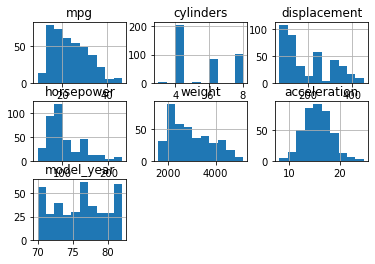

In [28]:
# 판다스에서 제공하는 시각화 hist 사용
# 판다스의 히스토 그램은 모든 변수에 대해서 시각화 해주 때문에 전체적인 것을 파악하는 데에 좋음
df.hist()
# 로그값 : array(~)

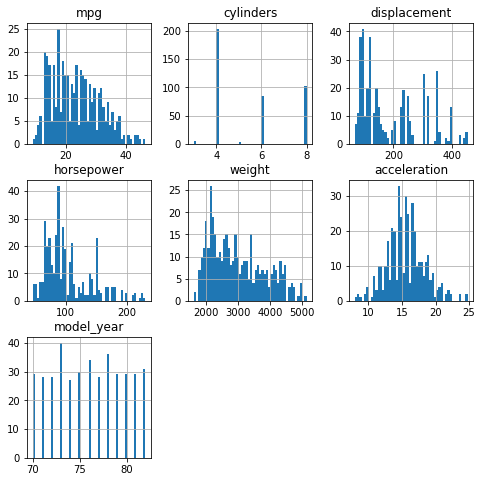

In [41]:
# 로그값 없애기 / 그래프 사이즈 조정 / 막대 개수 조정 
# cylinders, model year 가 수치형이지만 범주형으로 간주하고 분석해 볼 수 있겠다.
# acceleration은 정규분포랑 가깝다.

_=df.hist(figsize =(8,8), bins = 50)

In [63]:
# 이제 각각의 변수 1개씩 살펴보지

***
* Seaborn

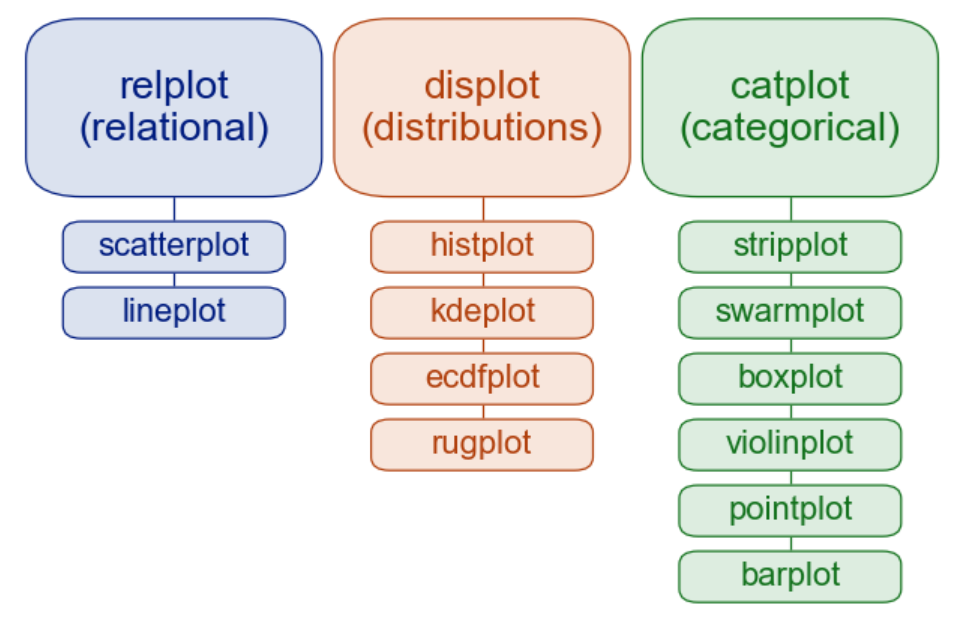

## [ displot ]
* distribution
* 서브 플롯이 가능한 플롯으로 기본값이 hist 이다
* histplot / kdeplot / ecdfplot / rugplot

<Figure size 360x360 with 0 Axes>

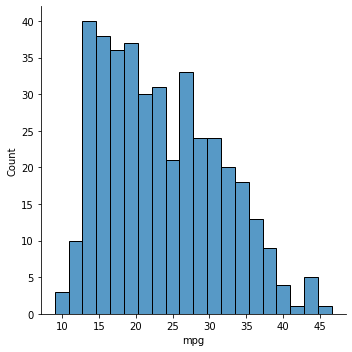

In [60]:
# displot은 서브플롯이 가능 한 plot으로 기본값이 hist 이다)
plt.figure(figsize = (5,5))
sns.displot(data=df, x='mpg',bins=20)

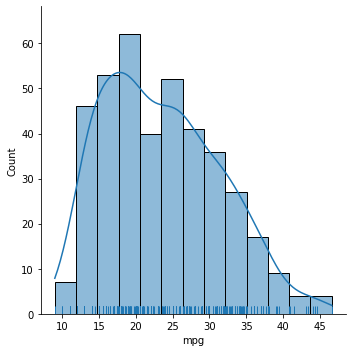

In [56]:
sns.displot(data=df, x='mpg', kde=True, rug=True)

###  histplot

<AxesSubplot:xlabel='mpg', ylabel='Count'>

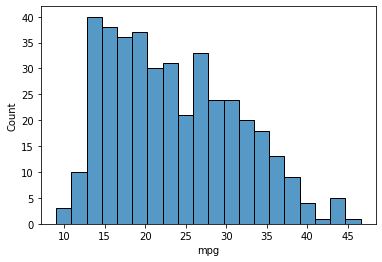

In [45]:
sns.histplot(data=df, x= 'mpg', bins=20)

### kdeplot
* 밀도 추정 곡선

<AxesSubplot:xlabel='mpg', ylabel='Density'>

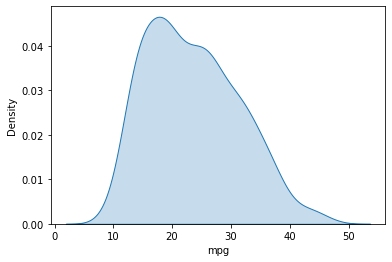

In [61]:
# kdeplot, rugplot으로 밀도함수 표현하기
# 말도함수그래프와 같이 자주 쓰는 것은 violin plot

sns.kdeplot(data=df, x='mpg', shade =True)

<AxesSubplot:xlabel='mpg', ylabel='Density'>

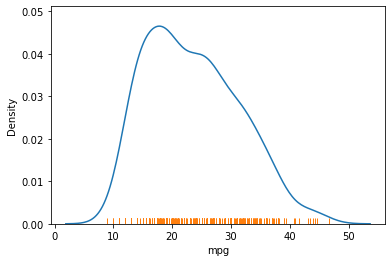

In [62]:
# 2개 겹치게 그릴수도 있음 

sns.kdeplot(data=df, x='mpg')
sns.rugplot(data=df, x='mpg')

### ecdfplot

<AxesSubplot:xlabel='mpg', ylabel='Proportion'>

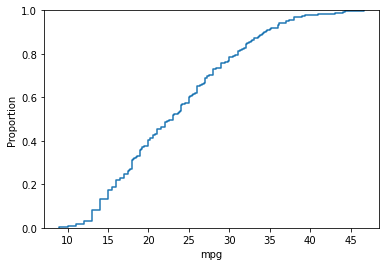

In [57]:
sns.ecdfplot(data=df, x='mpg')

### rugplot

<AxesSubplot:xlabel='mpg'>

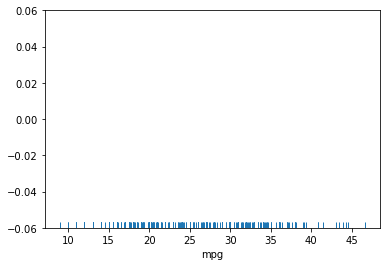

In [58]:
sns.rugplot(data=df, x='mpg')

In [64]:
# mpg 값에 대해 agg로 skew, kurt 값 구하기

df['mpg'].agg(['skew', 'kurt'])

# 

skew    0.457066
kurt   -0.510781
Name: mpg, dtype: float64

## **2.2) 2개 이상의 수치형 변수**

## [ relplot ]
* relational
* 서브플롯 가능 / 기본은 scatterplot 이다)
* scatterplot / lineplot 

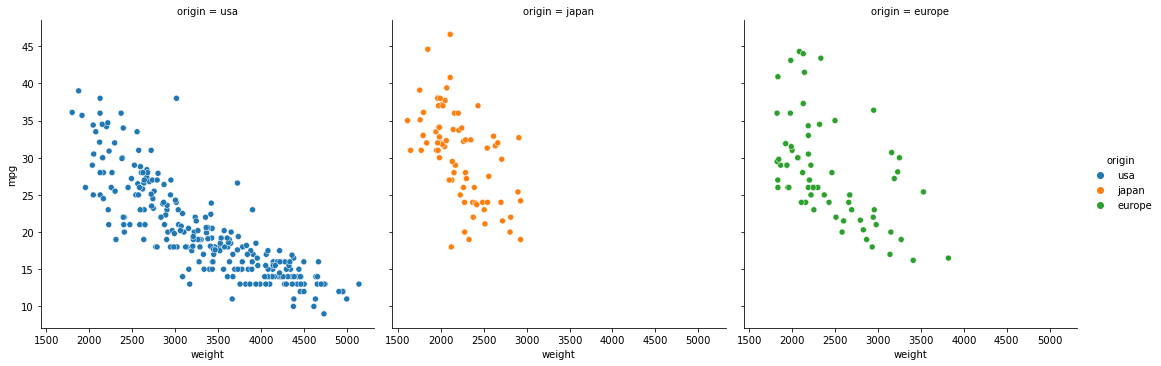

In [140]:
sns.relplot(data=df, x='weight', y='mpg', hue= 'origin', col='origin')

### scatterplot
* 2개 이상의 수치변수 비교시 수로 사용
* 음 or 양의 상관관계가 있는지 파악가능

<AxesSubplot:xlabel='weight', ylabel='mpg'>

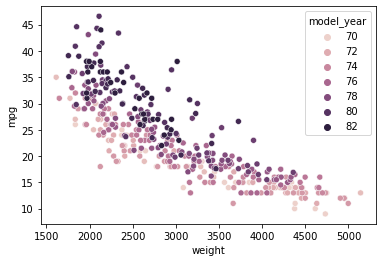

In [122]:
sns.scatterplot(data=df, x='weight', y='mpg', hue='model_year')
# 음의 상관관계가 있구나...

### line plot

<AxesSubplot:xlabel='model_year', ylabel='mpg'>

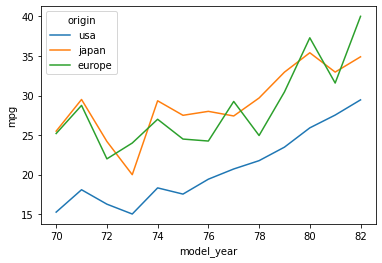

In [123]:
# lineplot으로 model_year, mpg를 시각화 합니다.

sns.lineplot(data=df, x='model_year', y='mpg', ci=None, hue='origin')

## regplot(회귀선)
* scatterplot에서 회귀선까지 그려주는 시각화
* hue 지원 x

<AxesSubplot:xlabel='weight', ylabel='mpg'>

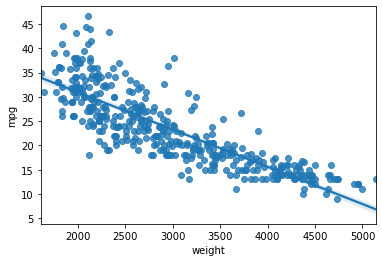

In [125]:
sns.regplot(data=df, x='weight', y='mpg')

## residplot (잔차 시각화 )
* 값이 회귀선에서 얼마나 가깝고 멀리 떨어져 있나)
* 잔차 ==> 오차값
* 잔차 == residual
* 0 = 회귀선 기준
* 내가 예측한 값과 실제값이 얼마나 오차가 나는지 확인해 볼때 사용한다. 

<AxesSubplot:xlabel='weight', ylabel='mpg'>

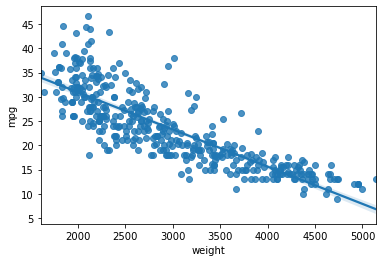

In [126]:
sns.regplot(data=df, x='weight', y='mpg')

## [ lmplot (회귀선 + hue) ]
* 서브플롯 가능 
* regplot과 형태는 같으나 hue를 지원한다
* regplot은 hue 지원 안함

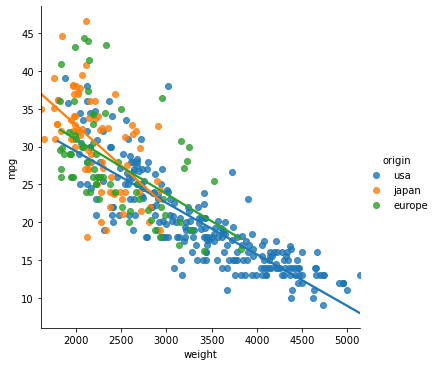

In [129]:
sns.lmplot(data=df, x='weight', y='mpg', hue='origin', ci=None)

<Figure size 288x288 with 0 Axes>

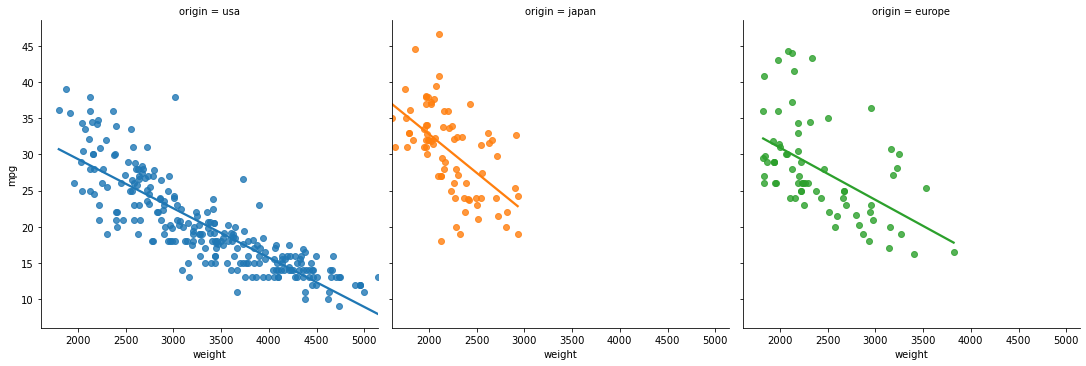

In [132]:
plt.figure(figsize=(4,4))
sns.lmplot(data=df, x='weight', y='mpg', hue='origin', col='origin',ci=True)

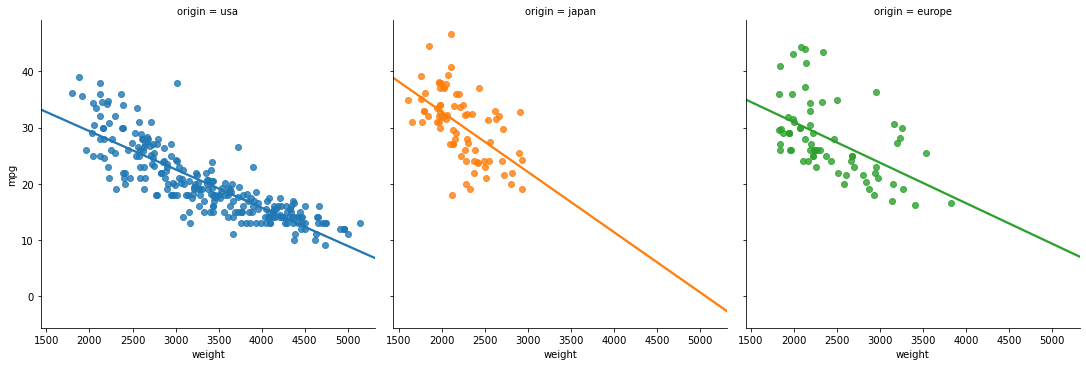

In [133]:
# 위에보면 회귀선이 데이터있는 곳 까지만 그려지는데
# truncate=False를 하면 끝까지 그려준다
sns.lmplot(data=df, x='weight', y='mpg', hue='origin',col='origin', truncate = False ,ci=True)

## [ jointplot ]
* 2개의 plot을 join해서 같이 표현해 줌
* 서브플롯 가능
* kind = { scatter, kde, hist, hex, reg, resid }

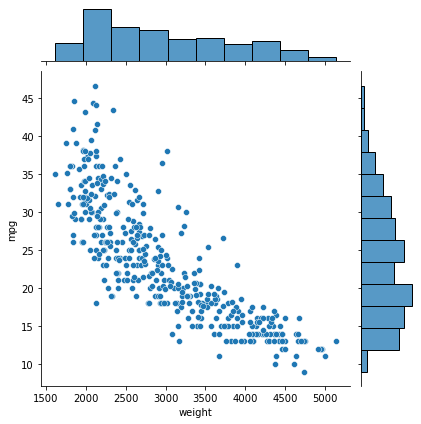

In [135]:
sns.jointplot(data=df, x='weight', y='mpg')

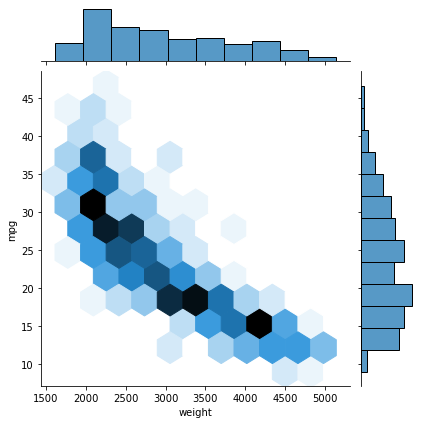

In [136]:
sns.jointplot(data=df, x='weight', y='mpg', kind ='hex')

## [ pairplot ]
* 2개의 컬럼끼리 다 묶어서 관계 비교(따라서 오래걸린다.)
* 서브 플롯 가능  (kind = {scatter, kde, hist, reg }
* 시간이 오래 걸리기 때문에 일부 샘플을 추출해 그려보고(100개)
* 샘플의 수를 늘려가며 그리는 걸 추천합니다.

(100, 9)


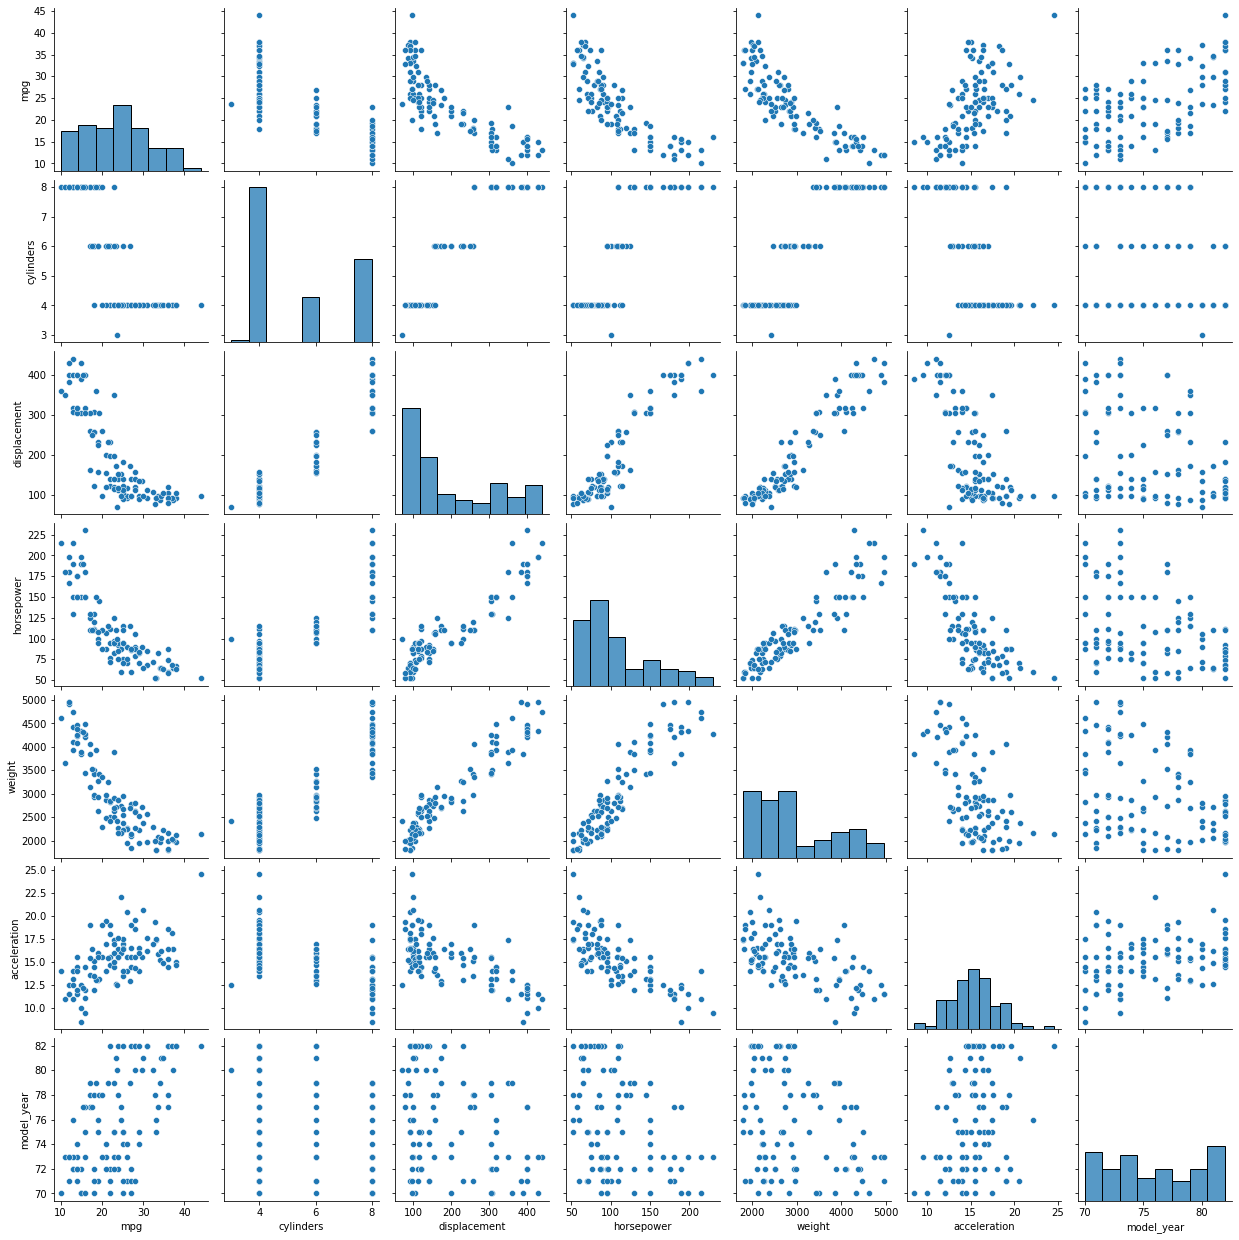

In [137]:
df_sample = df.sample(100, random_state=42)
print(df_sample.shape)
sns.pairplot(data= df_sample)

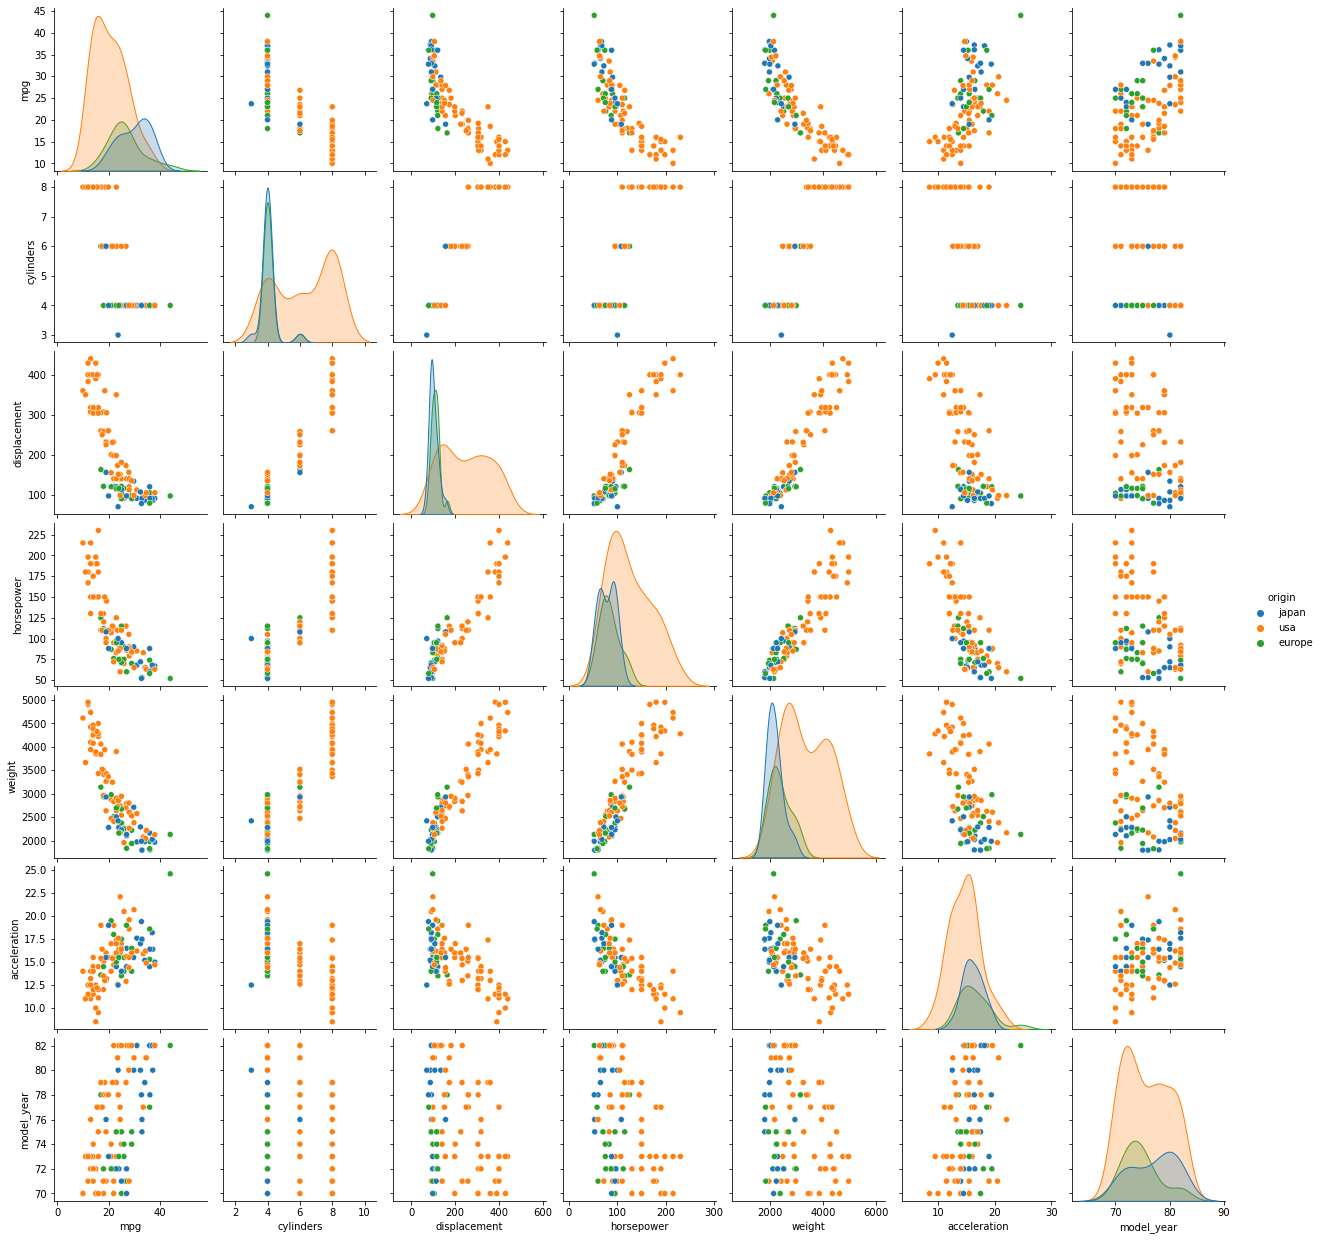

In [138]:
# hue 값을 줄 수도 있다.
sns.pairplot(data= df_sample, hue='origin')

## ***배경지식 2 : 상관분석**

### 상관분석

상관 분석(相關 分析, Correlation analysis) 또는 '상관관계' 또는 '상관'은 확률론과 통계학에서 두 변수간에 어떤 선형적 또는 비선형적 관계를 갖고 있는지를 분석하는 방법이다. 두 변수는 서로 독립적인 관계이거나 상관된 관계일 수 있으며 이때 두 변수간의 관계의 강도를 상관관계(Correlation, Correlation coefficient)라 한다. 상관분석에서는 상관관계의 정도를 나타내는 단위로 모상관계수로 ρ를 사용하며 표본 상관 계수로 r 을 사용한다.

**상관관계의 정도를 파악하는 상관 계수(相關係數, Correlation coefficient)는 두 변수간의 연관된 정도를 나타낼 뿐 인과관계를 설명하는 것은 아니다. 두 변수간에 원인과 결과의 인과관계가 있는지에 대한 것은 회귀분석을 통해 인과관계의 방향, 정도와 수학적 모델을 확인해 볼 수 있다.** ★★★★★

* 출처 : https://ko.wikipedia.org/wiki/%EC%83%81%EA%B4%80_%EB%B6%84%EC%84%9D

### 피어슨 상관계수

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/d/d4/Correlation_examples2.svg/800px-Correlation_examples2.svg.png" width="500">

```
일반적으로
r이 -1.0과 -0.7 사이이면, 강한 음적 선형관계,
r이 -0.7과 -0.3 사이이면, 뚜렷한 음적 선형관계,
r이 -0.3과 -0.1 사이이면, 약한 음적 선형관계,
r이 -0.1과 +0.1 사이이면, 거의 무시될 수 있는 선형관계,
r이 +0.1과 +0.3 사이이면, 약한 양적 선형관계,
r이 +0.3과 +0.7 사이이면, 뚜렷한 양적 선형관계,
r이 +0.7과 +1.0 사이이면, 강한 양적 선형관계
```


## Heatmap
* annot =True ==> heatmap에 값을 표시해 준다. 

### 상관계수 구하기
* -1 에서 1 사이 값
* 양의 상관계수, 음의 상관계수

In [153]:
# 데이터프레임 전체의 수치변수에 대해 상관계수를 구합니다.
corr =df.corr()
corr

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
mpg,1.000000,-0.775396,-0.804203,-0.778427,-0.831741,0.420289,0.579267
cylinders,-0.775396,1.000000,0.950721,0.842983,0.896017,-0.505419,-0.348746
displacement,-0.804203,0.950721,1.000000,0.897257,0.932824,-0.543684,-0.370164
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361
weight,-0.831741,0.896017,0.932824,0.864538,1.000000,-0.417457,-0.306564
acceleration,0.420289,-0.505419,-0.543684,-0.689196,-0.417457,1.000000,0.288137
model_year,0.579267,-0.348746,-0.370164,-0.416361,-0.306564,0.288137,1.000000


In [145]:
print(plt.colormaps())

['Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r

<AxesSubplot:>

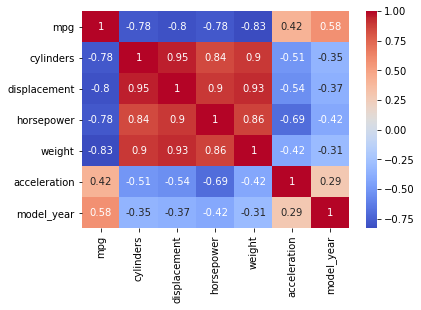

In [155]:
sns.heatmap(data=corr, annot= True, cmap='coolwarm')

<AxesSubplot:>

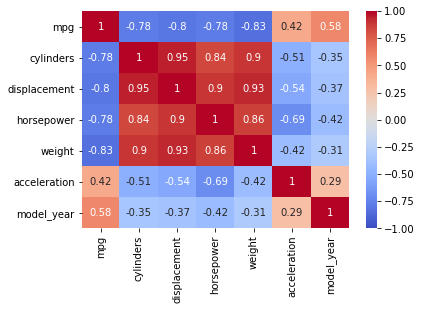

In [169]:
sns.heatmap(data=corr, annot= True, cmap='coolwarm', vmax=1, vmin=-1)

### mask 씌우기

In [156]:
# np.triu : matrix를 상삼각행렬로 만드는 numpy math
# [1 2 3]   np.triu  [1 2 3]
# [4 5 6]   -------> [0 5 6]
# [2 3 4]            [0 0 4]
# np.ones_like(x) : x와 크기만 같은 1로 이루어진 array를 생성

# 수식적으로 어려워 보일수도 있지만 간단함
# 자기상관계수는 대각행렬을 기준으로 대칭되어 같은 값이 출력되므로,
# 이대로 전체를 heatmap을 plot하면 오히려 가독성이 떨어질 수 있음
# 이에, 가독성을 높이기 위해 대각행렬 기준으로 한쪽의 데이터들만 masking 기법을 통해 plot하여 
# 가독성을 높이는 효과를 가질수 있음
# np.ones_like로 heatmap의 마스크값 구하기
# mask 
np.ones_like(corr)

array([[1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.]])

In [157]:
np.triu(np.ones_like(corr))

array([[1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1.]])

In [158]:
mask = np.triu(np.ones_like(corr))
mask

array([[1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1.]])

<AxesSubplot:>

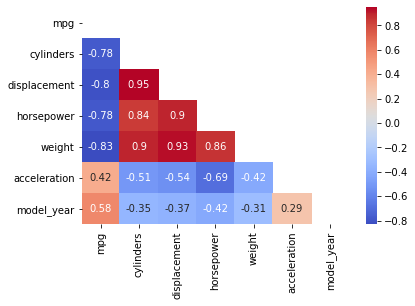

In [159]:
sns.heatmap(corr, annot=True, cmap ='coolwarm', mask=mask)

# 3. **범주형** 변수 시각화

In [163]:
df.nunique()

# cylinders, model_year, origin을 범주형으로 보고 분석해보자.

mpg             129
cylinders         5
displacement     82
horsepower       93
weight          351
acceleration     95
model_year       13
origin            3
name            305
dtype: int64

## countplot
* 빈도수 시각화 하기
* 그룹화 한 로직
* 1개 변수의 빈도수를 표현할 때는 countplot을 사용한다.

<AxesSubplot:xlabel='origin', ylabel='count'>

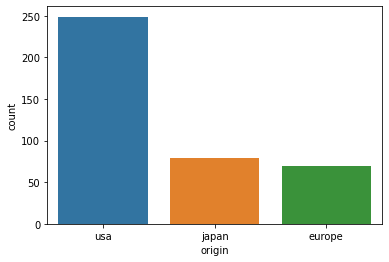

In [170]:
sns.countplot(data =df, x='origin')

<AxesSubplot:xlabel='origin', ylabel='Count'>

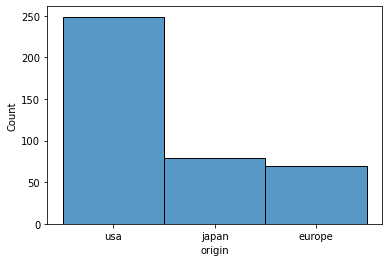

In [171]:
# histplot과 비교하기
sns.histplot(data=df, x='origin')

<AxesSubplot:xlabel='origin', ylabel='count'>

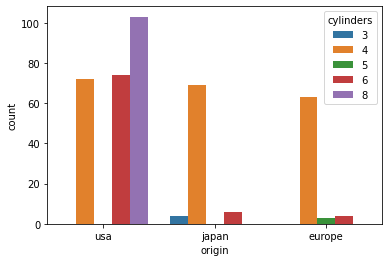

In [172]:
# countplot에 hue 사용
# countplot 으로 origin 의 빈도수를 시각화 하고 cylinders 로 다른 색상으로 표현하기
sns.countplot(data =df, x='origin', hue='cylinders')

<AxesSubplot:xlabel='cylinders', ylabel='count'>

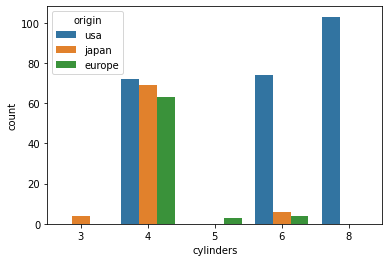

In [173]:
# countplot 으로 cylinders 의 빈도수를 시각화 하고 origin 으로 다른 색상으로 표현하기
sns.countplot(data =df, x='cylinders', hue='origin')

In [174]:
# pd.crosstab 으로 시각화한 값 직접 구하기
pd.crosstab(df['origin'], df['cylinders'])

# => origin에 따른 cylinder의 빈도수

cylinders,3,4,5,6,8
origin,,,,,
europe,0,63,3,4,0
japan,4,69,0,6,0
usa,0,72,0,74,103


# 4. **범주형(x) vs 수치형(y축)**

## [ catplot ]
* categorical
* 서브 플롯 가능 / stripplot이 기본 값
* stripplot / swarmplot / boxplot /violinplt / pointplot / barplot

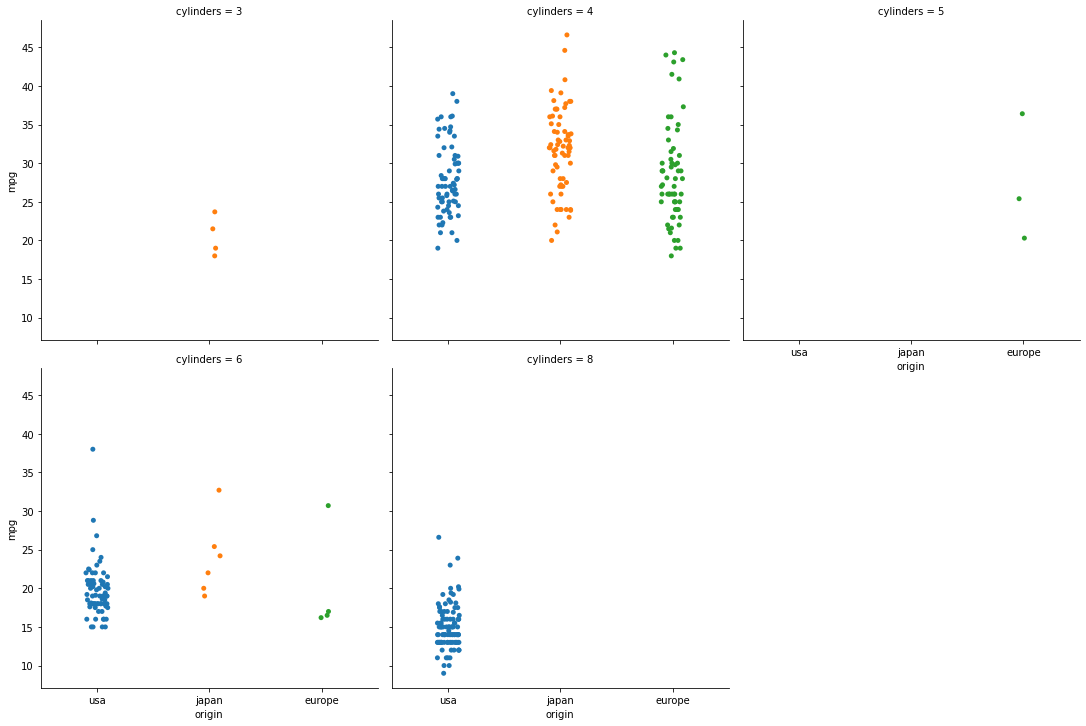

In [243]:
sns.catplot(data=df, x='origin', y='mpg', col='cylinders',col_wrap=3)

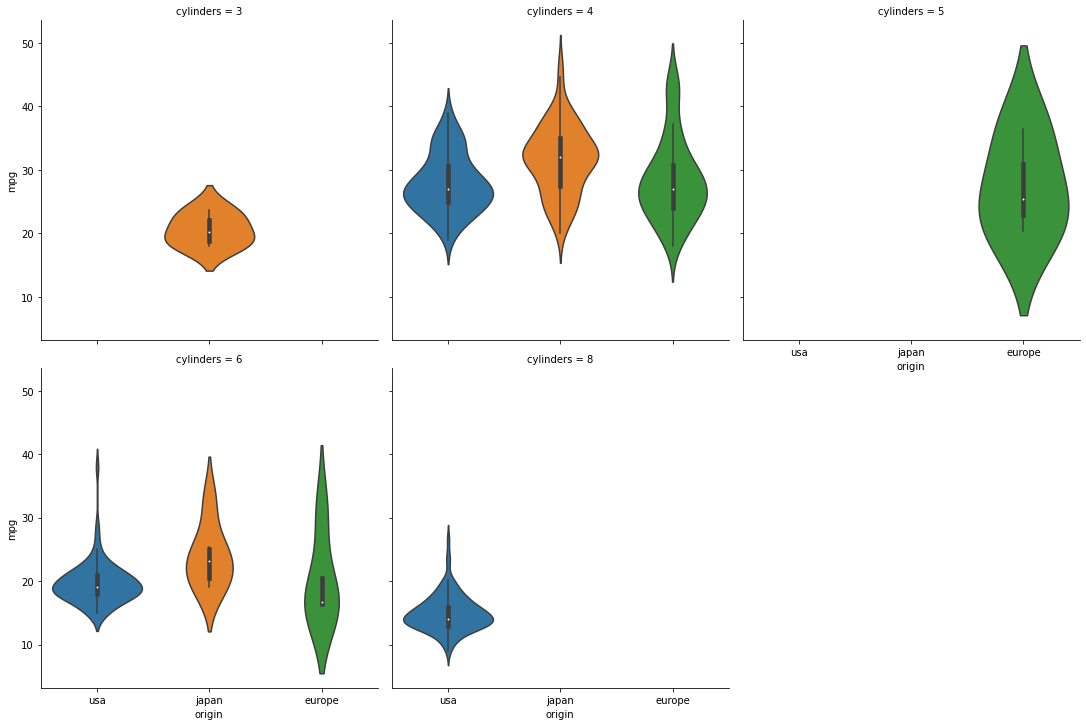

In [244]:
sns.catplot(data=df, x='origin', y='mpg', col='cylinders',col_wrap=3, kind ='violin')

### barplot
* 기본 출력값 = 평균

<AxesSubplot:xlabel='origin', ylabel='mpg'>

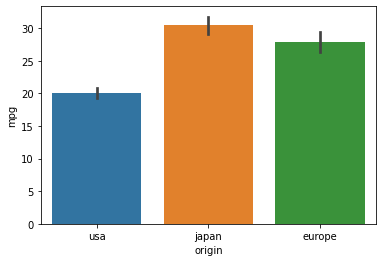

In [185]:
# barplot 으로 origin 별 mpg 값 구하기
# mpg는 평균값이 출력되네? 기본 출력 값은 평균이다.

sns.barplot(data=df, x='origin', y='mpg' )

In [186]:
# groupby로 위에 시각화 값 계산해보기
# groupby를 통해 origin 별로 그룹화 하고 mpg 의 평균 구하기
df.groupby('origin')['mpg'].mean()

origin
europe    27.891429
japan     30.450633
usa       20.083534
Name: mpg, dtype: float64

In [187]:
# pivot_table 로 같은 값 구하기  ==> 기본적으로 mean 값을 구한다.
pd.pivot_table(data= df , index = 'origin', values = 'mpg')

,mpg
origin,
europe,27.891429
japan,30.450633
usa,20.083534


<AxesSubplot:xlabel='origin', ylabel='mpg'>

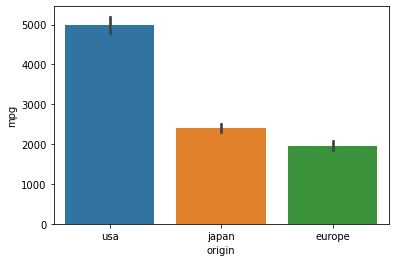

In [191]:
# barplot의 기본 출력값은 평균이다
# estimator=np.sum 로 통해 다른 값으로 출력가능하다.
sns.barplot(data=df, x='origin', y='mpg', estimator=np.sum)

<AxesSubplot:xlabel='cylinders', ylabel='mpg'>

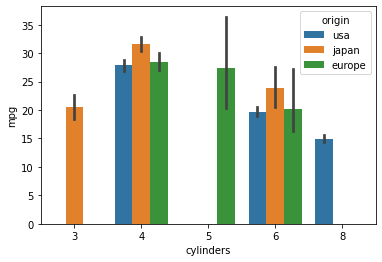

In [192]:
# barplot 에 hue 를 사용하여 색상을 다르게 표현해 보기
sns.barplot(data=df, x='cylinders', y='mpg', hue ='origin')

In [195]:
# groupby 를 통해 위 시각화에 대한 값을 구하기
df.groupby(['cylinders','origin'])['mpg'].mean()

cylinders  origin
3          japan     20.550000
4          europe    28.411111
           japan     31.595652
           usa       27.840278
5          europe    27.366667
6          europe    20.100000
           japan     23.883333
           usa       19.663514
8          usa       14.963107
Name: mpg, dtype: float64

In [196]:
# unstack ==> 마지막 인덱스 값(='origin')을 컬럼으로 올려주면서 dataframe 형태로 불러온다.
df.groupby(['cylinders','origin'])['mpg'].mean().unstack()

origin,europe,japan,usa
cylinders,,,
3,NaN,20.550000,NaN
4,28.411111,31.595652,27.840278
5,27.366667,NaN,NaN
6,20.100000,23.883333,19.663514
8,NaN,NaN,14.963107


In [197]:
# pivot_table 를 통해 위 시각화에 대한 값을 구하기
df.pivot_table(index='cylinders', columns='origin', values='mpg')

origin,europe,japan,usa
cylinders,,,
3,NaN,20.550000,NaN
4,28.411111,31.595652,27.840278
5,27.366667,NaN,NaN
6,20.100000,23.883333,19.663514
8,NaN,NaN,14.963107


<AxesSubplot:xlabel='origin', ylabel='mpg'>

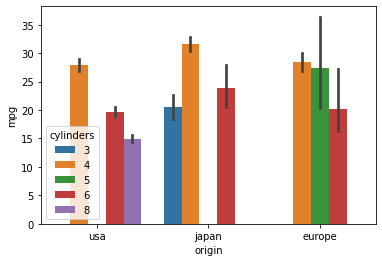

In [198]:
# cylinders 와 mpg 의 x, hue 값을 변경해서 시각화
sns.barplot(data=df, x='origin', y='mpg', hue='cylinders')

### boxplot
* y축에 들어가는 수치형 변수의 기술통계 값을 시각화

<AxesSubplot:xlabel='origin', ylabel='mpg'>

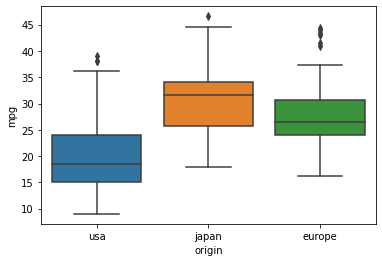

In [248]:
# boxplot 으로 origin 별 mpg 의 기술통계 값 구하기
sns.boxplot(data=df, x='origin', y='mpg')

In [203]:
# groupby로 origin 값에 따른 mpg의 기술통계 구하기
# 결과를 변수에 할당하여 재사용하기
g = df.groupby('origin')['mpg'].describe()
g

,count,mean,std,min,25%,50%,75%,max
origin,,,,,,,,
europe,70.0,27.891429,6.723930,16.2,24.0,26.5,30.65,44.3
japan,79.0,30.450633,6.090048,18.0,25.7,31.6,34.05,46.6
usa,249.0,20.083534,6.402892,9.0,15.0,18.5,24.00,39.0


#### **배경지식3 : boxplot 이해하기**

* 제 3사분위 수 (Q3) : 중앙값 기준으로 상위 50% 중의 중앙값, 전체 데이터 중 상위 25%에 해당하는 값
* 제 1사분위 수 (Q1) : 중앙값 기준으로 하위 50% 중의 중앙값, 전체 데이터 중 하위 25%에 해당하는 값
* 사분위 범위 수(IQR) : 데이터의 중간 50% (Q3 - Q1)
* Q3보다 1.5IQR 이상 초과하는 값과 Q1보다 1.5IQR 이상 미달하는 값은 점이나, 원, 별표 등으로 따로 표시한다(이상치 점).


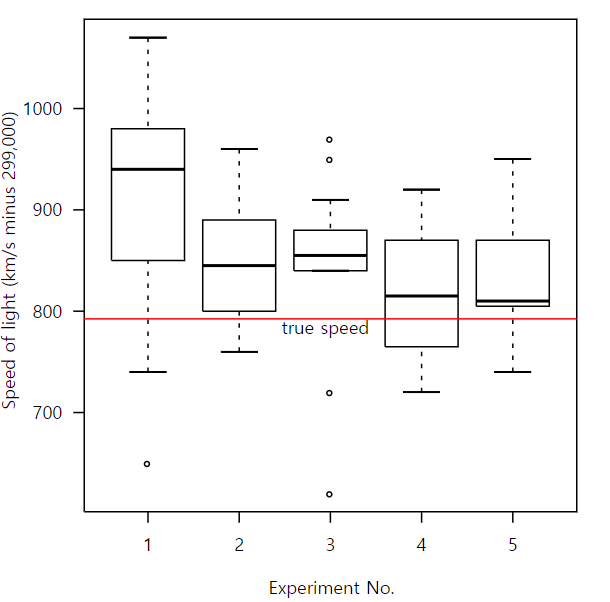

[출처:위키백과](https://ko.wikipedia.org/wiki/%EC%83%81%EC%9E%90_%EC%88%98%EC%97%BC_%EA%B7%B8%EB%A6%BC)

#### 이상치값 구하기

In [209]:
g.loc["europe", '75%']

30.65

In [210]:
# IQR, 이상치를 제외한 최댓값, 최솟값 구하기
Q3 = g.loc["europe", '75%']
Q1 = g.loc["europe", '25%']
IQR = Q3- Q1
OUT_MAX = Q3 + (1.5 * IQR)  
OUT_MIN = Q1 - (1.5 * IQR) 
(OUT_MAX,OUT_MIN)

(40.625, 14.025000000000002)

In [214]:
a =df[df['mpg']> OUT_MAX]
a

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
244,43.1,4,90.0,48.0,1985,21.5,78,europe,volkswagen rabbit custom diesel
309,41.5,4,98.0,76.0,2144,14.7,80,europe,vw rabbit
322,46.6,4,86.0,65.0,2110,17.9,80,japan,mazda glc
324,40.8,4,85.0,65.0,2110,19.2,80,japan,datsun 210
325,44.3,4,90.0,48.0,2085,21.7,80,europe,vw rabbit c (diesel)
326,43.4,4,90.0,48.0,2335,23.7,80,europe,vw dasher (diesel)
329,44.6,4,91.0,67.0,1850,13.8,80,japan,honda civic 1500 gl
330,40.9,4,85.0,NaN,1835,17.3,80,europe,renault lecar deluxe
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup


In [218]:
b =df[df['mpg']< OUT_MIN]
b.shape

(52, 9)

In [217]:
# 이상치 값들만 한 테이블로 보아보기
strange= pd.concat([a,b])
strange.shape

(61, 9)

<AxesSubplot:xlabel='origin', ylabel='mpg'>

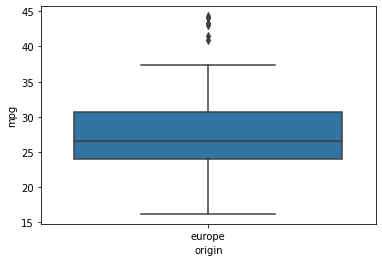

In [221]:
# europe 에 해당되는 값에 대해 boxplot 그리기
# x 생략 가능
europe =df[df['origin']=='europe']
sns.boxplot(data=europe, x='origin', y='mpg')

### boxenplot
* boxplot 단점 보완

<AxesSubplot:xlabel='origin', ylabel='mpg'>

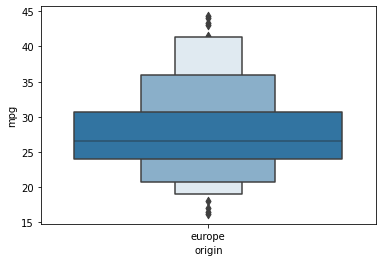

In [229]:
# boxenplot 그리기
sns.boxenplot(data=europe, x='origin', y='mpg')

### violinplot
* boxplot의 단점 보완

<AxesSubplot:xlabel='origin', ylabel='mpg'>

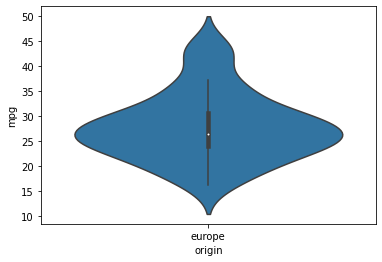

In [228]:
sns.violinplot(data=europe, x='origin', y='mpg')

### stripplot(범주형 산점도)

<AxesSubplot:xlabel='origin', ylabel='mpg'>

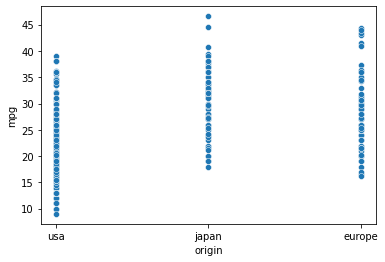

In [230]:
# scatterplot 으로 범주형 변수 그리기
#범주형에 적합하지 않는 데이터 표현임을 확인할 수 있다.
sns.scatterplot(data=df, x='origin', y='mpg')

<AxesSubplot:xlabel='origin', ylabel='mpg'>

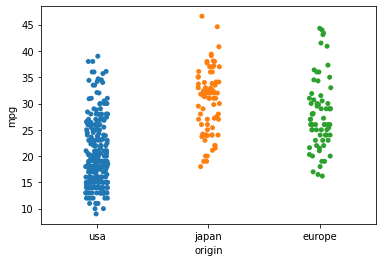

In [231]:
# stripplot => scatterplot의 단점을 보완
sns.stripplot(data=df, x='origin', y='mpg')

### swarmplot
* stripplot 단점 보완
* size = 점 사이즈 
    * 찍어야할 점의 개수(데이터 수)가 너무 많으면 오래걸리고, warning 메세지 뜬다
    * 이럴경우에 점 사이즈를 작게 하여 시각화 한다.

<AxesSubplot:xlabel='origin', ylabel='mpg'>

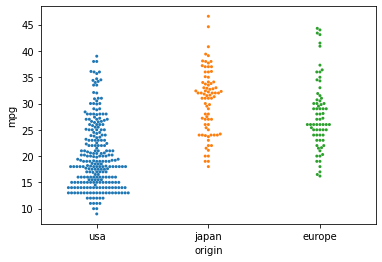

In [234]:
# size = 점 사이즈 
# 찍어야할 점의 개수(데이터 수)가 너무 많으면 오래걸리고, warning 메세지 뜬다
# 이럴경우에 점 사이즈를 작게 하여 시각화 한다.
sns.swarmplot(data=df, x='origin', y='mpg',size=3)

### pointplot

<AxesSubplot:xlabel='origin', ylabel='mpg'>

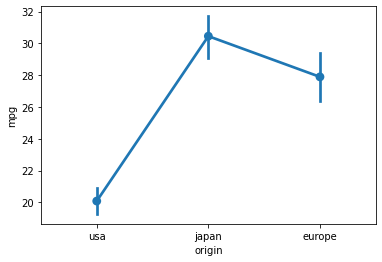

In [235]:
sns.pointplot(data=df, x='origin', y='mpg', size=3)